In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Linear Regression

<div class='legend'>
<ul style="margin-left: 5px">
      <li><a href='#simple~linear~regression'>Simple Linear Regression </a> </li> 
      <li><a href='#grad~sim~linear'>Gradient Descent over simple linear regression</a> </li>
      <li><a href='#learning-rate'>Effect of different values for learning rate</a> </li>
      <li><a href='#m-linear-r'>Multiple Linear Regression</a> </li>
    <li><a href='#impl-multi'>Implementation of gradient descent for Multiple Linear regression using NUMPY</a> </li>
     <li><a href='#insurence'>Test of our implemntation in 'insurance.csv' dataset </a> </li>
     <li><a href='#MLE'>The probabilistic approach to linear regression.Maximum likelihood estimation </a> </li>
</ul> 
</div>    


&nbsp; &nbsp; In statistic, Linear Regression is an linear approach to modeling the relationship between one or more explanatory variable (independent or dependent. The case of one explanatory variable is  called  Simple Linear Regression for  more then one is called Multiple Linear Regression.In Linear Regression the relationships are modeled using <a href='https://en.wikipedia.org/wiki/Linear_predictor_function'> linear predictors function </a> whose unknown parameters are estimated from data.

<h2 id='simple~linear~regression'> Simple linear regression </h2>

&nbsp; &nbsp; Simple Linear regression has a single explanatory variable. It concerns two- dimensional sample points and one independent variable. (Conventionally x and y data point in a Cartesian coordinate system). The adjective simple refers to the fact that the outcome variable is related to a single predictor.  

In [7]:
def set_spines():
    ax = plt.gca()  # gca stands for 'get current axis'
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_ylabel('x')


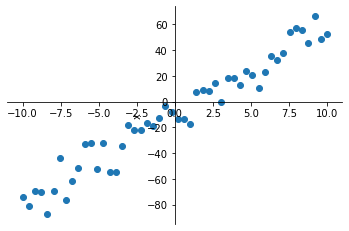

In [9]:
x = np.linspace(-10,10)
f = lambda x : 7*x + 3 + np.random.normal(-10,10)
y =[f(i) for i in x]
plt.scatter(x,y)
set_spines()

The graph shows  $n$ data pairs denoted with $(x_i,y_i), i = 1,2,...,n$.
We can describe the underlying relationship between $y_i$ and $x_i$ invloving the error term $\varepsilon_i$ in linear equation $y_i =  \alpha + \beta x_i + \varepsilon $.The  $\varepsilon_i$  could be intepreted as the noise of the data or in some sense some type of randomness originated from various reasons.Also it is know as 'error term' or 'residual'.
Our target is to find estimated values $\alpha$ and $\beta$ which would provide the best fit in some sense for data points.
In order to find the 'best' fit we will use the <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>least-squared</a> approach.From  mathematical view point the issue involved the minimization of Cost function or Error function respect to $\alpha,\beta$. 
 $$1) \:  J(\alpha,\beta,x_i,y_i) = \sum_i(y_i - \alpha - \beta x_i)^2$$.
$J$ is called $Cost$ function the expression $(y_i - \alpha - \beta x_i)^2$ is called $Lost$ function.This function is appropiative because of it is a diferencianal everywhere and gives us  a measure of diference between dependent value $y_i$ and predicted value of $y'(\alpha,\beta)=\alpha + \beta x_i $.<br>
In order to find $min_{\alpha,\beta}J(\alpha,\beta,x_i,y_i)$ we will use Gradient Descent method.<br>

<h2 id='grad~sim~linear'>Gradient Descent over simple linear regression</h2>

&nbsp; &nbsp;  The methods for finding the maximum and minima (extrema) have been created with developing of mathematical analysis(calculus).Gradient Descent is a numerical approach to finding a local minimum of a first-order differentiable function. The idea is to take repeated steps in the opposite direction of the gradient of a function at the current point. 

The Gradient Descent algorithm is difined by : <br>
  $$\alpha = \alpha - \nabla_{\alpha}J(\alpha,\beta)*h$$
  $$\beta = \beta - \nabla_{\beta}J(\alpha,\beta)*h$$ <br>
  

The above equations are performed enough times to reach the minimum of Loss function. $h$ is called learning rate

In [10]:
def gradient_descent(X, Y, h=0.1, E=100):
    '''
    
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    C (number) :  learning rate
    I(int) : number of iteration(Epoch)
    Returns :
      number of cost function
   '''
   
    a = b = 0 #initial value
    a_args  = []
    b_args = []
    n = X.size
  
    for i in range(E):
        a = a + 2/n*(np.sum((Y - a*X - b)*X))*h
        b =  b + 2/n*(np.sum((Y - a*X -b)))*h
        a_args.append(a)
        b_args.append(b)
    return a,b,a_args,b_args 

In [11]:
a, b, a_r, b_r = gradient_descent(x, y, h=0.01, E=400)

(6.897191437619058, -9.92500735399942)

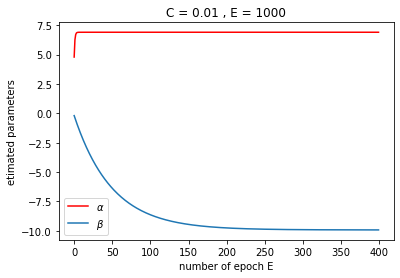

In [12]:
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.01 , E = 1000')
plt.legend()
a,b


During the learning process we can see that curves tend to result $(\alpha \approx 6.9, \beta \approx  9.92)$.

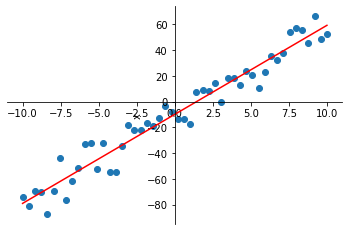

In [14]:
plt.scatter(x,y) 
plt.plot(x,6.918205132062*x - 9.92,color='r')
set_spines()

We've found that the best fit wich discribe our data is the line $y'=6.9.x +4.48$

 <h2 id='learning-rate'>Effect of different values for learning rate </h2>

The Learning rate $h$ is the tunning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of cost function.While the gradient direction is usually determined from the gradient of the cost function, the learning rate determines how big a step is taken in that direction.The too hight learning rate will make  the learning jump  over minima but too low leaning rate will either take too long to converge or get stuck in an undesirable local minimum.In order to achieve faster convergence, prevent oscillations and getting stuck in undesirable local minima the learning rate is often varied during training either in accordance to a learning rate schedule or by using an adaptive learning rate.

Let's take different values for the learning rate $h$ and try to understand its impact on the algorithm.

$h = 0.000001$

(-5.334157361845766e+59, 2.3845980189037437e+42)

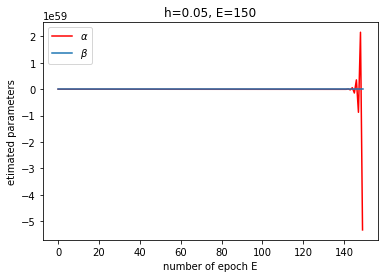

In [15]:
a,b,a_r,b_r = gradient_descent(x,y,h=0.05,E=150)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('h=0.05, E=150')
plt.legend()
a,b

we can see that curves tend to result $(\alpha \approx -5.3, \beta \approx  2.4)$.

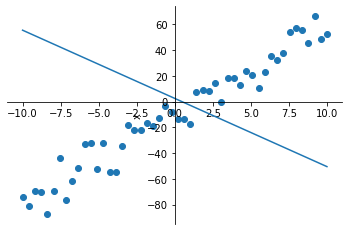

In [16]:
plt.scatter(x,y) 
plt.plot(x,-5.3*x +  2.476)
set_spines()

We can see that the learning rate is too big and as result the algorithms makes a learning jump wich leads to extremly bad result.

(2.7806585335865357, 0.04611991087616225)

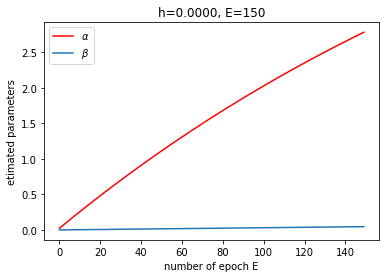

In [77]:
a,b,a_r,b_r = gradient_descent(x,y,h=0.00005,E=150)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('h=0.0000, E=150')
plt.legend()
a,b

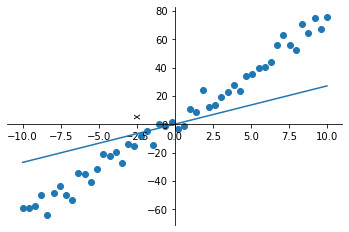

In [79]:
plt.scatter(x,y) 
plt.plot(x,2.7*x +  0.01)
set_spines()

In the above case, the learning rate is too small and the algorithm is learned too slow, we can make up for that  problem by increasing learning rate or by increasing the number of iterations or so-called epochs, the finding of balance between both would improve the result.
In the below example we will increase the number of epochs to observe will have an improvement.

(6.89719143761893, -8.730548354552354)

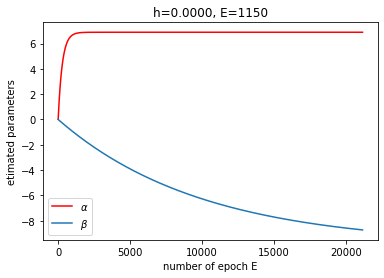

In [17]:
a,b,a_r,b_r = gradient_descent(x,y,h=0.00005,E=21150)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('h=0.0000, E=1150')
plt.legend()
a,b

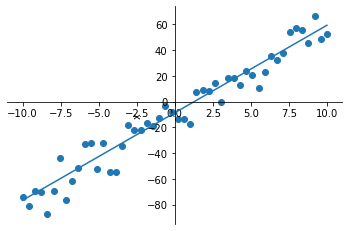

In [18]:
plt.scatter(x,y) 
plt.plot(x,6.8*x - 8.7)
set_spines()

The answer is 'yes'. But by increasing the number of epochs the computation time is increased too, which takes more time consuming for the learning process. 

<h1 id='m-linear-r'>2. Multiple Linear Regression in matrix form.</h1>

Multiple Linear Regression also known as multiple regression, is a statistical technique that uses several explanatory variable to predict the outcome of response variable.In essence, MLR is an extension of ordinary least-squared regression.The equation that we are searching for is defined by : <br> <br>
$$\hat{ y}^i= h(x{^i}) =  \vartheta_0 + \vartheta_1 x^i_{1} + \vartheta_2 x_{2}^i+ ...\vartheta_p x_{p}^i + \varepsilon_i $$
<br> <br>
where , $i$ is number of obeservation,
$y_i$ dependet(target) value,
$x_p $ feature values,
$\vartheta_0$ intercept,
$\vartheta_{p}$ slope coeff. for each explanority var, $\varepsilon_i$ is error term,


The above hypotesis can also be represented by : <br>
 $$\hat{Y} = X\Theta^T$$ <br> <br>
 where $ \Theta =\begin{bmatrix}
\vartheta_0\\
\vdots \\
\vartheta_p \\
\end{bmatrix}$ $X = \begin{bmatrix} 
1 &x_1^1 & x_1^2 & x_1^n \\
\vdots & \ddots & \vdots & \vdots \\
1& x_p^1 & \dots & x_p^n \\
\end{bmatrix} $ and $\hat{Y} = \begin{bmatrix}
\hat{y}^0\\
\vdots \\
\hat{y}^p \\
\end{bmatrix}$
<br> <br>
we've append column $\hat{Y} = \begin{bmatrix}
1\\
\vdots \\
1\\
\end{bmatrix}$ to $X$ in order to be used in matrix multiplication directly.

To define and measure the error of our model we define the cost function as the sum of the squares of the residuals. The cost function is denoted by :
    $$2)\hspace{1cm} J(\varTheta) = \frac{1}{2m}\sum_{i=0}^m(h(x^i) - y^i)^2 $$

We have to initialize the model parameter with some random values(random initialization).To use Gradient Descent we need to measure how the cost function changes with change in it's parametes.Therefore we compute the partial derivatives of cost finction $4)\hspace{1cm}  J(\vartheta_0,\vartheta_1,...,\vartheta_n)$ <br> <br>
$$ 3) \frac{\partial{J(\varTheta)}}{\partial{\theta_j}} = \frac{1}{m}\sum_{i=0}^m(h(x^i) - y^i)x_j^i$$
In more compatable form using matrix in order to be implemnted using <mark>NUMPY</mark>


Using the <a href='https://en.wikipedia.org/wiki/Einstein_notation' > Eistein notaion </a> we can rewrite eq. 3) <br> <br> <br>
$$ \frac{\partial{J(\vartheta_k)}}{\partial{\theta_j}} = \frac{1}{m}(\theta_p x_p^i - y^i)x_j^i $$ in matrix form <br> <br> <br>
 $$4) \hspace{1cm}  \vec{\nabla} J(\varTheta)=((X\Theta^T- Y)^T.X)^T $$ <br> <br>
  applying the rule  $(AB)^T$ the eq can be reformed
   $$5) \hspace{1cm}  \vec{\nabla} J(\varTheta)= X^T(X\Theta^T- Y) $$  <br> <br>
 $$ where  \hspace{1cm} \vec{\nabla} = \frac{\partial}{\partial{\theta_j}\vec{e_j}}$$ <br> <br>

 eq. 6 is extremely comfortable because it can be implemented very simple in <mark>NUMPY</mark> which is many times faster than common Python


The Gradient Descent algorithm will looks like that : <br>
 $$\Theta = \Theta - h\vec{\nabla} J(\varTheta) $$ h is learnig rate


We will be using Root mean squared error(RMSE) of Determination($R^2$ score)  to evaluate our model.<br>
RMSE is a square root of average of sum of suares of residualas.
RMSE is difined by : <br>
$$ RMSE =\sqrt{\frac{1}{2}\sum_{i=1}^m(h(x^i)- y ^i)} $$
R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression.<br>
$R^2$ is determed by 
    $$R^2 = 1 - \frac{SS_r}{SS_t}$$

SS_t  is the total sum of errors if we take the mean of the observed values as the predicted value.
$$SS_t =\sum_{i=1}^m( y ^i -\bar{y})^2 $$ <Br>
    $$ SS_r =\sum_{i=1}^m(h(x^i)- y ^i)^2 $$

<h2 id ='impl-multi'>Implementation of gradient descent for Multiple Linear regression using NUMPY</h2>

In [84]:
class MultipleLinearRegression:
    """
    Multiple Linear regression

    Parameters
    ..........

    C : float
        learning rate
    I : int
        number of iterations (Epochs)
    Attributes
    ..........
     w_ : weights (Predictors)

    """

    def __init__(self, C=0.001, I=50):
        self.C = C
        self.I = I
        self.w_ = None

    def fit(self, X, Y):
        """Fit tthe training data

        Parameters
        ..........

        X : array, shape = [N_samples,n_features]
            Training samples
        Y  : array, shape = [n_samples, n_target_values]

        Returns
        .......
        self : object

        """

        X, Y = self._validate(X, Y)
        self.w_ = np.ones((X.shape[1], 1))  # inicialized predictors
        M = X.shape[0]  # numbers of samples
        for _ in range(self.I):
            self.w_ =self.w_ -  self.C * (1 / M) * X.T.dot((X.dot(self.w_) - Y))
            #self.w -= self.C * (1 / M) * X.T.dot((X.dot(self.w) - Y))


        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        x = np.append(np.ones((x.shape[0], 1)), x, axis=1)
        return np.dot(x, self.w_)

    def score(self,X, Y):
        """Calculation of accuracy using (R^2 score)
             x : array-like, shape = [n_samples, n_features]
             y : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        float : score
        -------
        Predicted value

        """
        #X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        #Y = np.array(Y).reshape(X.shape[0], 1)
        X,Y = self._validate(X,Y)
        y_prime = np.dot(X, self.w_)
        ssr = np.sum((y_prime - Y) ** 2)
        sst = np.sum((Y - np.mean(y_prime)) ** 2)
        r2_score = 1 - (ssr / sst)
        return r2_score
    
    def _validate(self,X,y):
        '''Added tow with one number to X data
        reshape Y data


        :param X: array-like, shape = [n_samples, n_features]
        :param y: array-like, shape = [n_samples, n_target_values]
        :return: validated X,Y
        '''
        return   np.append(np.ones((X.shape[0], 1)), X, axis=1),\
                 np.array(y).reshape(y.shape[0], 1)

<h2 id='insurence'>Test of our implemntation in 'insurance.csv' dataset</h2>

In [87]:
#load dataset
df = pd.read_csv("../resources/data/insurance.csv")  
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Converting Categories to Numbers. The linear regression can be performed only on numbers, so we must convert these categorical features into numbers. To do that, we can make use of a function called get_dummies.
So let’s convert the “sex,” “smoker,” and “region” columns into numerically represented features.

In [88]:
cols = ['sex', 'smoker', 'region']
new_df = pd.get_dummies(df, cols, drop_first= True)
new_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Now, let’s only select the features that are the most relevant. Feature selection is one of the important tasks in any machine learning project. You must know which features are most correlated with the targets (the “charges” column in our case) and must only use those features that have a high correlation with your target. This can be done through experimentation. For example, in this problem, I tried using the “sex” and “region” features to predict “charges” but didn’t find much of an improvement in the prediction performance of the model. So I decided to omit these features from the model. Through small experimentation like that, I found the “age,” “bmi,” and “smoker” columns to be most relevant when predicting insurance costs (the “charges” column in our data frame).

In [91]:
X = new_df[['age', 'bmi', 'smoker_yes']]
y = new_df['charges']

In [ ]:
We will perfomr standarlization over X,  before spliting into test and train data.

In [93]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Let's  train the data using our implementation

In [94]:
model =  MultipleLinearRegression(C=0.01,I=1000)
z = model.fit(X_train,y_train)

In [95]:
model.score(X_test,y_test)

0.7505450496652133

We've achived according to 𝑅2 score 75% accuracy

In [ ]:
Let see how will be in standart LinearRegresion in sklearn in Python

In [96]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
lr.score(X_test,y_test)

0.7499131966055586

The score using implementation in <mark>sklearn</mark>  is the almost the same as our implementation , Let to compare the predicted values.

In [98]:
our_predicted_data = model.predict(X_test)[:,0]
python_predicted_data = lr.predict(X_test)
pd.DataFrame(our_predicted_data ,python_predicted_data  )

,0
6641.345993,6641.679451
3038.320627,3038.165225
7606.316258,7606.411403
7791.440926,7790.606893
12073.850781,12072.767689
...,...
11615.034360,11615.967093
6888.739724,6887.629092
35292.083162,35291.359220
26483.190385,26482.121680


The diferences is too small,but we can perform $R^2 score$ over the both Python and Our predicted  data .

In [99]:
ssr = np.sum((our_predicted_data - python_predicted_data) ** 2)
sst = np.sum((our_predicted_data - np.mean(python_predicted_data)) ** 2)
r2_score = 1 - (ssr / sst)
r2_score

0.9999999904989635

0.9999999976969305 shows that the difference is negligible

<h2 id='MLE'>The probabilistic approach to linear regression.Maximum likelihood estimation.</h2>

Till this moment for linear regression  $𝑦𝑖=𝛼+𝛽𝑥𝑖+𝜀_i$  we've assumed that the error term $𝜀_i$ is some kind of noise coming from unknown reasons.. Now we gonna assume that the errors term for each point are Gaussian distributed with mean zero and some unknown variance $\sigma$
$$𝜀 \sim N(0,\sigma^2) $$

Due to the error term, $𝜀_i$ is Gaussian distributed the target variable $y_i$ is also Gaussian distributed with the same variance as $𝜀$ $\sigma^2$ and mean $\mu_i = \alpha + \beta x_i$ 

$$ y_i \sim  N( \theta_0 + \theta_1 x_i,\sigma^2)  $$

The probability density function for $y_i$ is
$$ p(y_i | x_i,\Theta,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{ -\frac{ ((\theta_0 + \theta_1 x_i)- y_i)^2 }{2\sigma^2}}$$

<img src="https://miro.medium.com/max/1400/1*T9kndoqrTzk9Eev70-l1fA.png" title="source : Bayesian Thinking for Linear Regression @ Kaggle Days Meetup" width="500" height="600"/>

The basic idea is that if the data were to have been generated by the model, what parameters were most likely to have been used? That is, what is the probability of seeing the data $D$ , given a specific set of parameters $\Theta$? Once again, this is a conditional probability density problem. We are seeking the values  of $\Theta$ that maximise $p(D|\Theta)$.

$$\Theta = argmax_{\Theta}p(D,|\theta)$$

In linear regression problems we need to make the assumption that the feature vectors are all independent and identically distributed, such that we can use joint probabily for every pair $(x_i,y_i)$ <br> <br>
$$l(\Theta) = p(Y | X ,\Theta,\sigma^2)=\prod_i p(y_i | x_i,\Theta ,\sigma^2) $$

We can get $log$ of $l(\Theta)$, these function is called log likelihood function. $$L = log\prod_i p(y_i | x_i,\Theta ,\sigma^2) $$ likelihood and likelyhood has a maxim for the same $\Theta$,that's way they make the same job also we use log-likelihood because :
* The log likelihood function in maximum likelihood estimations is usually computationally simpler [1].
* Likelihoods are often tiny numbers (or large products) which makes them difficult to graph. Taking the natural (base e) logarithm results in a better graph with large sums instead of products.
* The log likelihood function is usually (not always!) easier to optimize.

The natural log cancels out with the exponential, turns products into sums of logs, and division into subtraction of logs; so our log-likelihood looks much simpler:

<img src="https://miro.medium.com/max/700/1*gDNxsKgiWTj6AWmolmkjlQ.png">

Now log-likelihood can be wriiten as $l(\theta_0,\theta_1,\sigma^2)= -log(\sqrt{2\pi\sigma^2}) - \frac{1}{2\sigma^2}\sum(y_i - \theta_0 + \theta_1 x_i)$

To remove the negative signs, let’s recall that maximizing a log function is the same thing as minimizing the negative of the log. So instead of maximizing the likelihood, let’s minimize the negative log-likelihood:
       $$argmax_{\theta}
 l = - argmin_{\theta}l$$
      

To minimize the negative log-likelihood with respect to the linear parameters (the θs), we can imagine that our variance term is a fixed constant.Therefore, we can throw out any constant terms and elegantly write what we’re trying to minimize as: <br>
$$\sum(y_i - \theta_0 + \theta_1 x_i) $$ wich leads to the normal linear regression that we've investigated before. <br>
The maximum likelihood estimate for our linear model is the line which minimizes the sum of squared errors! 

<h2> References </h2>
* [1]  https://www.quantstart.com/articles/Maximum-Likelihood-Estimation-for-Linear-Regression/ 
* [2]  https://www.statisticshowto.com/log-likelihood-function/
* [3]  https://towardsdatascience.com/linear-regression-91eeae7d6a2e